In [1]:
from PIL import Image as PILImage
from img2table.document import Image
from img2table.ocr import TesseractOCR
from img2table.tables.processing.borderless_tables import identify_borderless_tables
from colordict import ColorDict
from IPython.display import display_html
import cv2
import numpy as np

C:\Users\xavca\PycharmProjects\img2table\venv\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(
C:\Users\xavca\PycharmProjects\img2table\venv\lib\site-packages\skimage\util\dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


In [2]:
import random
colors = ColorDict()

def get_color():
    idx = random.randint(0, len(colors) - 1)
    return list(colors.values())[idx]

### Loading image

In [19]:
img = Image(r"C:\Users\xavca\Pictures\test_2.png")
ocr = TesseractOCR()

ocr_df = ocr.of(img)

img = list(img.images)[0]

In [20]:
tables = identify_borderless_tables(img=img, ocr_df=ocr_df)

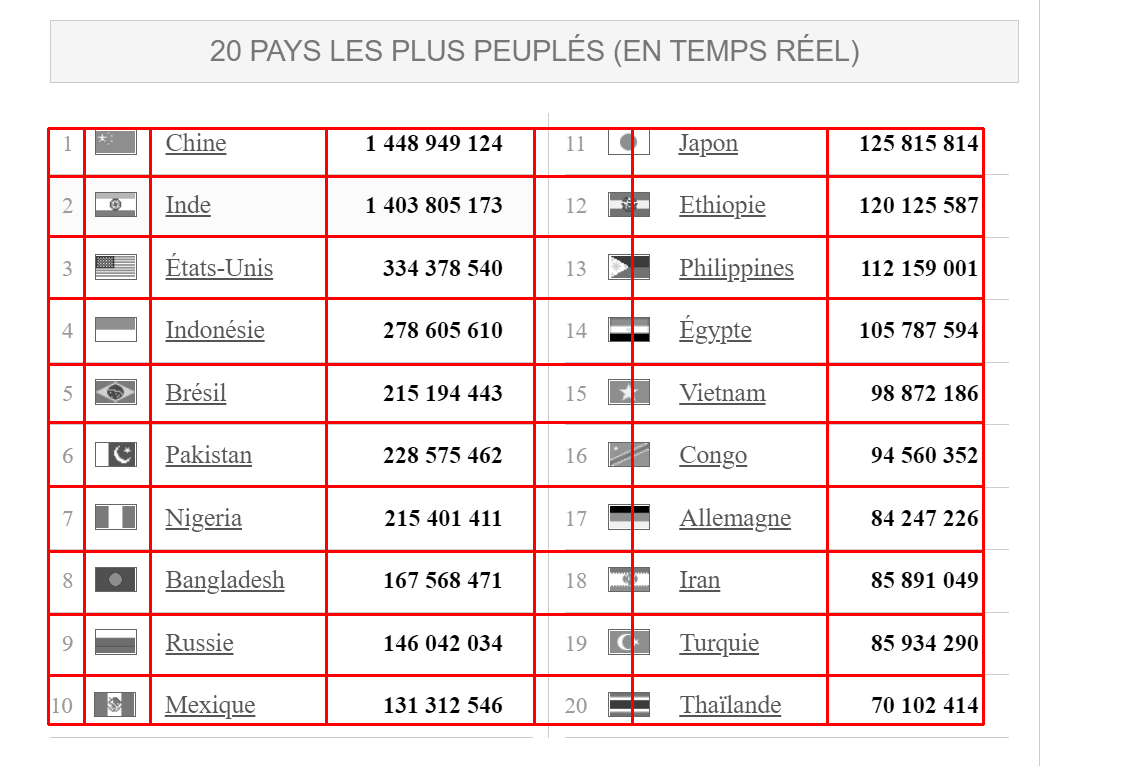

In [21]:
display_img = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2RGB)

for table in tables:
    table.get_content(ocr_df=ocr_df)
    for row in table.extracted_table.content.values():
        for cell in row:
            cv2.rectangle(display_img, (cell.bbox.x1, cell.bbox.y1), (cell.bbox.x2, cell.bbox.y2), (255, 0, 0), 2)
            
PILImage.fromarray(display_img)

In [22]:
for idx, table in enumerate(tables):
    display_html(table.extracted_table.html_repr(title=f"Extracted table n°{idx + 1}"), raw=True)

,0,1,2,3,4,5,6
0,None,None,Chine,1448 949 124,11,Japon,125815 814
1,None,None,Inde,1403805173,12,Ethiopie,120 125 587
2,3,None,Etats-Unis,334 378 540,13,Philippines,112 159 001
3,None,None,Indonésie,278 605 610,14,Egypte,105 787 594
4,None,None,None,215194 443,15,Vietnam,98 872 186
5,6,None,Pakistan,228 575 462,16,Congo,94 560 352
6,None,i,Nigeria,215401 411,17,Allemagne,84247226
7,None,None,Bangladesh,167 568 471,18,Iran,85891 049
8,None,None,Russie,146 042 034,19,Turquie,85934290
9,10,None,Mexique,131 312 546,20,Thailande,70 102 414
